In [28]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [29]:
data = sns.load_dataset('titanic')

In [30]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [31]:
X = data.drop('survived', 1)
y = data.survived

## Spliter

1. X_train and X_validation
2. y_train and y_validation

**PS:** Don't use transform training and validation datasets together


In [32]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, random_state=23)

# Feature Engineering

Feature engineering should be performed seperately for all datasets.

In [33]:
X_train['sex'] = X_train.sex.map({'male':0,
                'female':1})

X_train.embarked = X_train.embarked.map({'S':1,
                                        'C':2,
                                        'Q':3})

X_train['class'] = X_train['class'].map({'First':1,
                                   'Second':2,
                                   'Third':3
                                  })



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [34]:
drop_columns = ['who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone', 'class']

X_train = X_train.drop(drop_columns, 1)

In [35]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked
151,1,1,22.0,1,0,66.6000,1.0
753,3,0,23.0,0,0,7.8958,1.0
746,3,0,16.0,1,1,20.2500,1.0
684,2,0,60.0,1,1,39.0000,1.0
887,1,1,19.0,0,0,30.0000,1.0


In [36]:
X_train.isna().sum()

pclass        0
sex           0
age         135
sibsp         0
parch         0
fare          0
embarked      1
dtype: int64

In [37]:
X_train.age.fillna(X_train.age.median(), inplace=True)

In [38]:
X_train.embarked.fillna(1, inplace=True)

# Feature Union

In [12]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [13]:
pca = PCA(n_components=0.95)
skb = SelectKBest(chi2, k=6)
combined_features = FeatureUnion(transformer_list=[("pca", pca), ("skb",skb)],n_jobs=-1)

In [14]:
data = combined_features.fit_transform(X_train, y_train)

In [15]:
X_train, y_train = data[:, :-1], data[:,-1]

In [16]:
X_train.shape

(712, 7)

In [17]:
y_train.shape

(712,)

In [39]:
model = RandomForestClassifier(n_jobs=-1, n_estimators=20)

In [40]:
y_train=y_train.astype('int')

In [41]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [42]:
model.score(X_train, y_train)

0.9775280898876404

## Validation Transformation

In [43]:
X_val['sex'] = X_val.sex.map({'male':0,
                'female':1})

X_val.embarked = X_val.embarked.map({'S':1,
                                        'C':2,
                                        'Q':3})

X_val['class'] = X_val['class'].map({'First':1,
                                   'Second':2,
                                   'Third':3
                                  })

drop_columns = ['who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone', 'class']

X_val = X_val.drop(drop_columns, 1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [44]:
X_val.embarked.fillna(1, inplace=True)
X_val.age.fillna(X_val.age.median(), inplace=True)


# pca = PCA(n_components=0.95)
# skb = SelectKBest(chi2, k=6)
# combined_features = FeatureUnion(transformer_list=[("pca", pca), ("skb",skb)],n_jobs=-1)



# dataVal = combined_features.fit_transform(X_val, y_val)
# X_val, y_val = dataVal[:, :-1], dataVal[:,-1]

y_val=y_val.astype('int')



model.score(X_val, y_val)

0.7877094972067039

In [45]:
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [46]:
import joblib
joblib.dump(model, 'RandomFor.joblib')

['RandomFor.joblib']

In [47]:
X_val

,pclass,sex,age,sibsp,parch,fare,embarked
727,3,1,30.0,0,0,7.7375,3.0
668,3,0,43.0,0,0,8.0500,1.0
210,3,0,24.0,0,0,7.0500,1.0
654,3,1,18.0,0,0,6.7500,3.0
228,2,0,18.0,0,0,13.0000,1.0
...,...,...,...,...,...,...,...
629,3,0,30.0,0,0,7.7333,3.0
430,1,0,28.0,0,0,26.5500,1.0
432,2,1,42.0,1,0,26.0000,1.0
431,3,1,30.0,1,0,16.1000,1.0


In [48]:
model.predict([[1,1,1,1,1,1,1]])

array([1])

In [49]:
joblib.load('RandomFor.joblib')

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [60]:
pca = PCA(n_components=0.95, random_state=23)
pca.fit_transform(X_train)

array([[ 33.69687072,  -7.9954862 ],
       [-24.9859788 ,  -5.57072412],
       [-12.800058  , -12.90265954],
       ...,
       [-22.98621101,  11.34937876],
       [229.38922958, -13.83652185],
       [ -8.41243267,   6.98523682]])

In [57]:
pca.shape

(712, 2)

In [61]:
joblib.dump(pca, 'pca.joblib')

['pca.joblib']

In [63]:
_pca = joblib.load('pca.joblib')

In [64]:
_pca.fit_transform(X_val)

array([[-2.23908434e+01,  3.20579049e-01],
       [-2.15974673e+01,  1.32947049e+01],
       [-2.33029317e+01, -5.64921395e+00],
       [-2.38236362e+01, -1.16307564e+01],
       [-1.75712892e+01, -1.18508040e+01],
       [-1.46325720e+01,  1.14354682e-02],
       [-3.19782098e+00, -2.64767475e+01],
       [-2.20321624e+01, -8.69771137e+00],
       [-4.66420772e+00, -4.01792378e-01],
       [-2.24114376e+01,  6.32227973e+00],
       [-3.01156356e+01,  6.21047065e-01],
       [-2.28176140e+01,  3.35059257e-01],
       [-1.86184957e+01,  2.72054545e+01],
       [-2.32707551e+01,  3.51340888e-01],
       [ 4.28838971e+01, -1.41021850e+01],
       [-2.23783527e+01,  3.20113888e-01],
       [-2.22347461e+01,  3.13352967e-01],
       [ 1.02120782e+01,  5.13547884e+00],
       [-2.20792974e+01,  3.09570487e-01],
       [-1.40042522e+01,  1.00269688e+01],
       [-1.70267990e+01,  6.13566222e+00],
       [-1.99605079e+01, -2.58078956e+01],
       [ 2.26744012e+01,  5.64567776e+00],
       [-1.

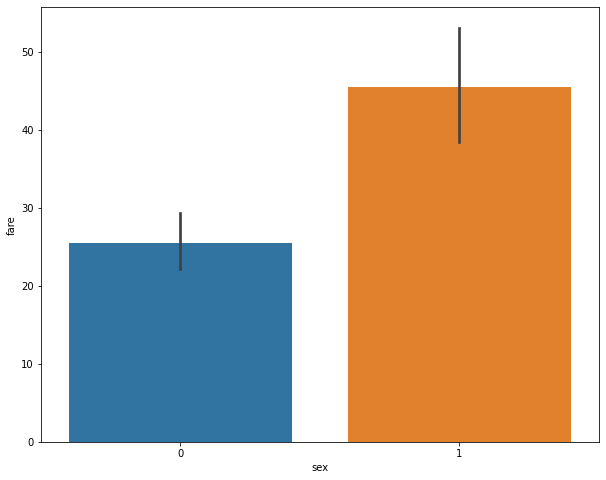

In [69]:
plt.figure(figsize=(10,8))
sns.barplot(X_train.sex, X_train.fare)
plt.savefig('Figure.png', dpi=100)

TypeError: 'MovieWriterRegistry' object is not an iterator

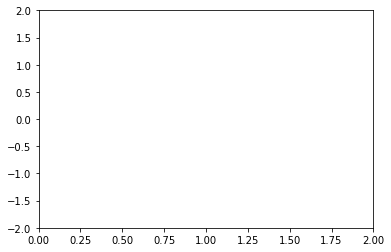

In [72]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

In [73]:
a = "it will rain today"
a.upper()

'IT WILL RAIN TODAY'

In [78]:
X_train.loc[(X_train.age >18) & (X_train.age<30)].survival

AttributeError: 'DataFrame' object has no attribute 'survival'

(array([29.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 22.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

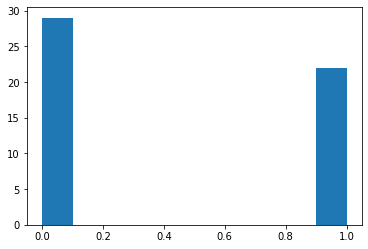

In [92]:
plt.hist(data.loc[(data.age >31) & (data.age<35)].survived)

(array([159.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  86.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

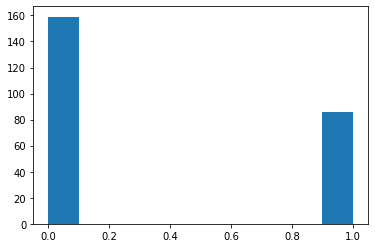

In [93]:
plt.hist(data.loc[(data.age >18) & (data.age<30)].survived)

In [95]:
len(data.loc[(data.age >18) & (data.age<30)].survived)/len(data)

0.27497194163860833

In [101]:
len(data.loc[(data.age >31) & (data.age<61)].survived)/len(data)

0.2962962962962963

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([36., 19., 63., 65., 52., 24., 21.,  9.,  0.,  1.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

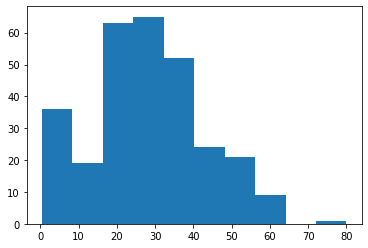

In [103]:
plt.hist(data.loc[data.survived == 1].age)